In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.metrics import confusion_matrix, classification_report


matplotlib.style.use('ggplot') 

In [2]:
%pwd

u'/Users/christophereppig/DSI_week3'

In [4]:
airports = pd.read_csv('~/Datasets/airport_small.csv')

In [5]:
airports.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004,242,235,71,46
1,ABQ,2005,221,190,61,33
2,ABQ,2006,392,329,71,124
3,ABQ,2007,366,304,107,45
4,ABQ,2008,333,300,79,42


In [6]:
airports.shape

(33, 6)

In [22]:
airports.dtypes

Airport                    object
Year                        int64
Departure Cancellations     int64
Arrival Cancellations       int64
Departure Diversions        int64
Arrival Diversions          int64
airportClass                int64
dtype: object

In [9]:
airports['Airport'].value_counts()

ANC    11
ATL    11
ABQ    11
Name: Airport, dtype: int64

## Clean the data

In [73]:
def airport_classifier(x):
    if x=="ABQ":
        return 0
    elif x=="ATL":
        return 1
    else:
        return 2

In [74]:
airports['airportClass'] = airports['Airport'].apply(airport_classifier)

In [75]:
airports.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,airportClass
0,ABQ,2004,242,235,71,46,0
1,ABQ,2005,221,190,61,33,0
2,ABQ,2006,392,329,71,124,0
3,ABQ,2007,366,304,107,45,0
4,ABQ,2008,333,300,79,42,0


## Plot the Data

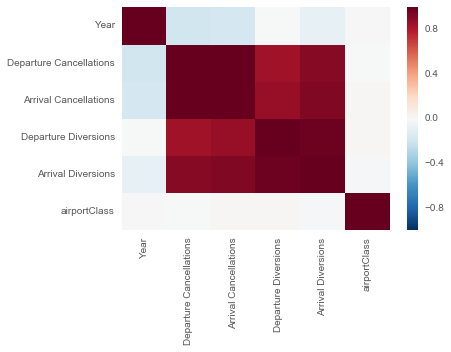

In [76]:
sns.heatmap(airports.corr())

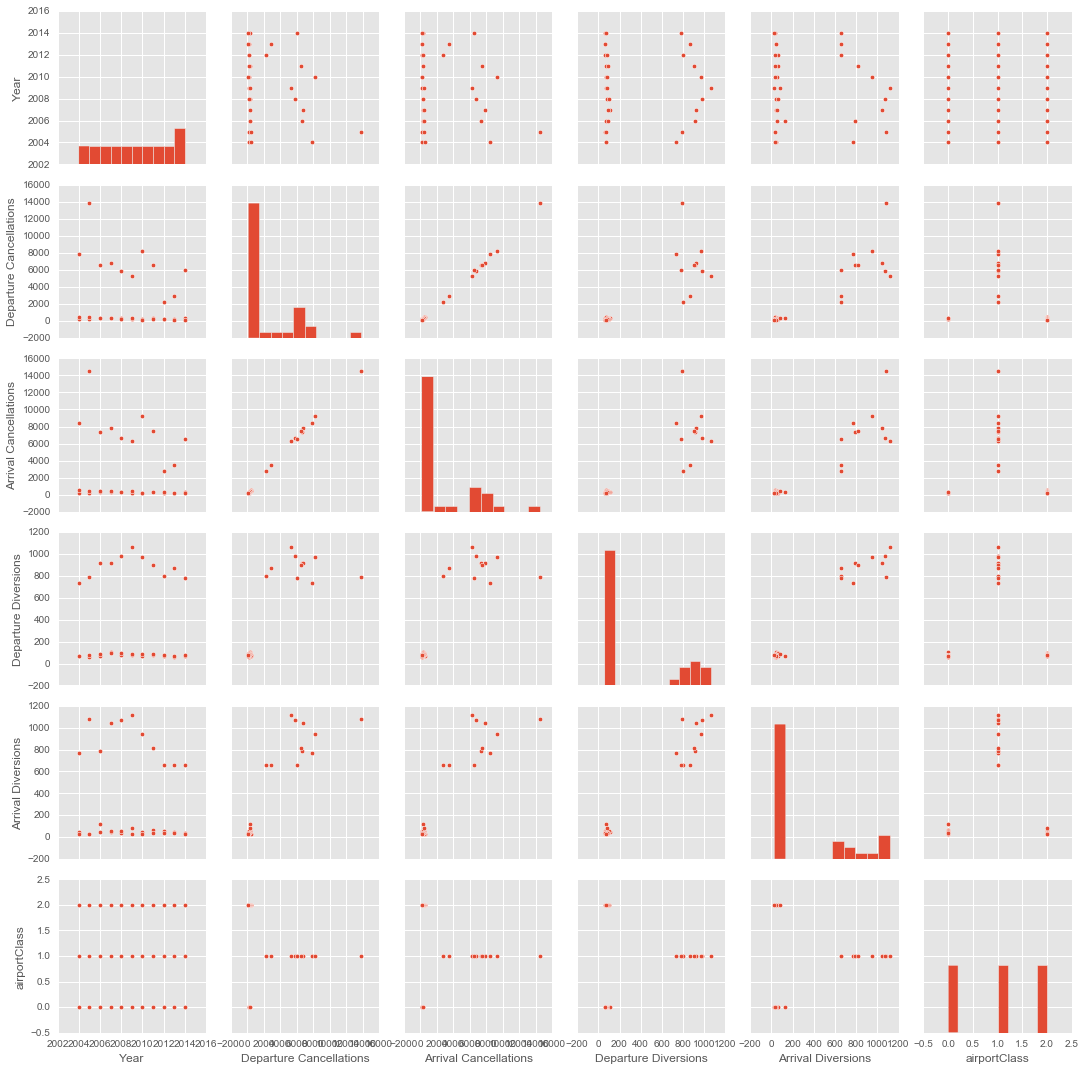

In [77]:
sns.pairplot(airports)

(array([ 22.,   1.,   1.,   1.,   5.,   2.,   0.,   0.,   0.,   1.]),
 array([   111. ,   1483.6,   2856.2,   4228.8,   5601.4,   6974. ,
          8346.6,   9719.2,  11091.8,  12464.4,  13837. ]),
 <a list of 10 Patch objects>)

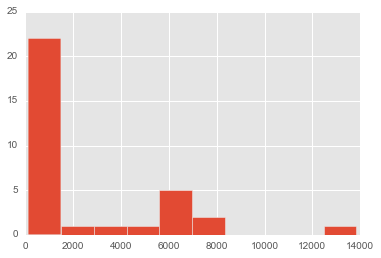

In [78]:
plt.hist(airports['Departure Cancellations'])

(array([ 22.,   1.,   1.,   0.,   4.,   3.,   1.,   0.,   0.,   1.]),
 array([   162. ,   1593.8,   3025.6,   4457.4,   5889.2,   7321. ,
          8752.8,  10184.6,  11616.4,  13048.2,  14480. ]),
 <a list of 10 Patch objects>)

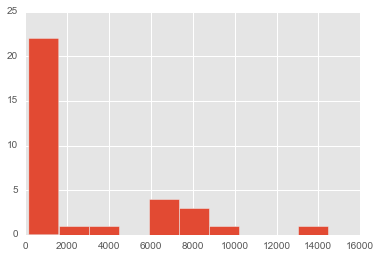

In [79]:
plt.hist(airports['Arrival Cancellations'])

(array([ 22.,   0.,   0.,   0.,   0.,   0.,   1.,   3.,   4.,   3.]),
 array([   61. ,   161.3,   261.6,   361.9,   462.2,   562.5,   662.8,
          763.1,   863.4,   963.7,  1064. ]),
 <a list of 10 Patch objects>)

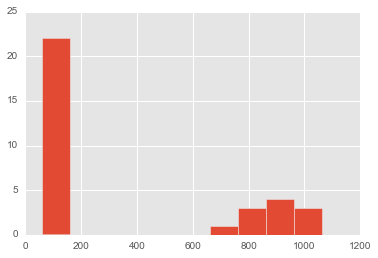

In [80]:
plt.hist(airports['Departure Diversions'])

(array([ 22.,   0.,   0.,   0.,   0.,   3.,   2.,   1.,   1.,   4.]),
 array([   26.,   135.,   244.,   353.,   462.,   571.,   680.,   789.,
          898.,  1007.,  1116.]),
 <a list of 10 Patch objects>)

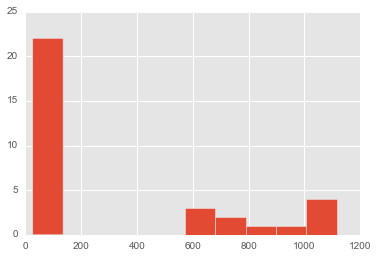

In [81]:
plt.hist(airports['Arrival Diversions'])

## KMeans clustering

In [82]:
airports.columns

Index([u'Airport', u'Year', u'Departure Cancellations',
       u'Arrival Cancellations', u'Departure Diversions',
       u'Arrival Diversions', u'airportClass'],
      dtype='object')

In [83]:
y = airports['airportClass']
x = airports[['Year', u'Departure Cancellations',
       u'Arrival Cancellations', u'Departure Diversions',
       u'Arrival Diversions']]

In [84]:
x_standard = StandardScaler().fit_transform(x)

In [85]:
x_standard = pd.DataFrame(x_standard, columns=[x.columns])

In [86]:
x_standard.head()

,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,-1.581139,-0.627179,-0.644790,-0.715988,-0.687156
1,-1.264911,-0.633357,-0.656888,-0.741990,-0.719479
2,-0.948683,-0.583049,-0.619517,-0.715988,-0.493215
3,-0.632456,-0.590698,-0.626239,-0.622383,-0.689642
4,-0.316228,-0.600407,-0.627314,-0.695187,-0.697102


In [87]:
list_of_scores = []

for x in range(2, 11): 
    kmeans = KMeans(n_clusters=x)
    kmeans.fit(x_standard)
    predictions = kmeans.predict(x_standard)
    sil = silhouette_score(x_standard, predictions)
    list_of_scores.append((x, sil))

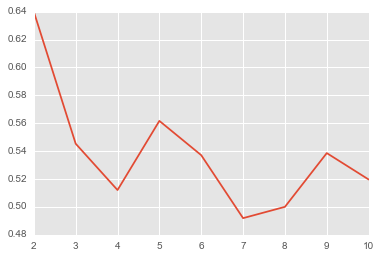

In [88]:
plt.plot([x[0] for x in list_of_scores],
         [x[1] for x in list_of_scores])

In [89]:
## I probably want to use 5 classifiers?

In [90]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_standard)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [91]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [92]:
labels

array([2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [93]:
set(labels)

{0, 1, 2}

In [94]:
centroids

array([[ 0.        ,  1.23226618,  1.25932119,  1.39911994,  1.36707855],
       [ 0.9486833 , -0.63485752, -0.64782793, -0.71104793, -0.69560971],
       [-0.79056942, -0.60052939, -0.61452116, -0.68998667, -0.67348058]])

In [113]:
km_predictions = kmeans.predict(x_standard)

In [114]:
km_predictions

array([2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [115]:
len(km_predictions)

33

In [99]:
set(predictions)

{0, 1, 2}

In [117]:
confusion_matrix(y, km_predictions)



array([[ 0,  5,  6],
       [11,  0,  0],
       [ 0,  5,  6]])

In [116]:
print classification_report(y, km_predictions)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        11
          1       0.00      0.00      0.00        11
          2       0.50      0.55      0.52        11

avg / total       0.17      0.18      0.17        33



In [60]:
y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    3
12    3
13    3
14    3
15    3
16    3
17    3
18    3
19    3
20    3
21    3
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    2
30    2
31    2
32    2
Name: airportClass, dtype: int64

In [118]:
km_predictions = pd.DataFrame(km_predictions, columns=['km_predictions'])

In [120]:
km_predictions

,km_predictions
0,2
1,2
2,2
3,2
4,2
5,2
6,1
7,1
8,1
9,1


In [140]:
et = ExtraTreesClassifier(
                n_estimators=1000,
                max_features=0.25,
                max_depth=2,
                n_jobs=-1,
                verbose=5
)

In [141]:
et.fit(x_standard, y)

building tree 1 of 1000building tree 2 of 1000

building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
 building tree 20 of 1000 building tree 21 of 1000

building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
buildin

[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    0.2s


building tree 302 of 1000
building tree 303 of 1000
building tree 304 of 1000
building tree 305 of 1000
 building tree 306 of 1000
building tree 307 of 1000
building tree 308 of 1000
building tree 309 of 1000
building tree 310 of 1000
building tree 311 of 1000
building tree 312 of 1000
building tree 313 of 1000
building tree 314 of 1000
building tree 315 of 1000
building tree 316 of 1000
building tree 317 of 1000
building tree 318 of 1000
building tree 319 of 1000
building tree 320 of 1000
building tree 321 of 1000
building tree 322 of 1000
building tree 323 of 1000
building tree 324 of 1000
building tree 325 of 1000building tree 326 of 1000
 
building tree 327 of 1000
building tree 328 of 1000
building tree 329 of 1000
building tree 330 of 1000
building tree 331 of 1000
building tree 332 of 1000
building tree 333 of 1000
building tree 334 of 1000
building tree 335 of 1000
building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building t

[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:    0.5s


building tree 563 of 1000
building tree 564 of 1000
building tree 565 of 1000
building tree 566 of 1000
building tree 568 of 1000
building tree 567 of 1000
building tree 569 of 1000
building tree 570 of 1000
building tree 571 of 1000
building tree 572 of 1000
building tree 573 of 1000
building tree 574 of 1000
building tree 575 of 1000
building tree 576 of 1000
building tree 577 of 1000
building tree 578 of 1000
building tree 579 of 1000
building tree 580 of 1000
building tree 581 of 1000
building tree 582 of 1000
building tree 583 of 1000
building tree 584 of 1000
building tree 585 of 1000
building tree 586 of 1000
building tree 587 of 1000
building tree 588 of 1000
building tree 589 of 1000
building tree 590 of 1000
building tree 591 of 1000
building tree 592 of 1000
building tree 593 of 1000
building tree 594 of 1000
building tree 595 of 1000
building tree 596 of 1000
building tree 597 of 1000
building tree 598 of 1000
building tree 599 of 1000
building tree 600 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.7s finished


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=2, max_features=0.25, max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=5, warm_start=False)

In [142]:
et.score(x_standard, y)

[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 874 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.4s finished


0.90909090909090906